### Prepare the args

In [ ]:
from exm.args import Args

project_path = '/mp/nas3/ruihan/20221218_zebrafish/'

# init args 
args = Args()
# set args 
args.set_params(project_path)

In [1]:
from exm.args import Args
args = Args()
args.load_params('/mp/nas3/ruihan/20230308_celegans/args_mansour.pkl')
args.gene_digit_csv = '/mp/nas3/ruihan/20230308_celegans/code0/gene_list.csv'


from exm.stitching.tileset import Tileset

# project_path = '/mp/nas2/ruihan/20221017_alignment'
project_path = '/mp/nas3/ruihan/20230308_celegans'

# nd2_file = f"{project_path}/20221017_alignment_slice1_final.nd2"
nd2_file = f"{project_path}/code0/Channel405 SD_Seq0004.nd2"

output_path = "."

# Provide the voxel size so that conversions between pixel and µm coordinates can happen
ts=Tileset([0.1625*2, 0.1625*2, 0.4])

# This specifies what ND2 file to use as reference but does not load all the tiles. It uses lazy loading where the
# costly operation of loading all tiles in memory will happen only when needed. It initalizes offsets using the 
# metadata contained in the ND2 file (microscope's encoder data)

ts.init_from_nd2(nd2_file)

output_path = "/home/mansour/refactor_branch/cleaning/align_vis/ExSeq-Toolbox/stitching"
ts.load_all(downscale=[1,1,1])
ts.update_offsets(f"{output_path}/example_output.v1.xml")

### Inspect 2D raw images

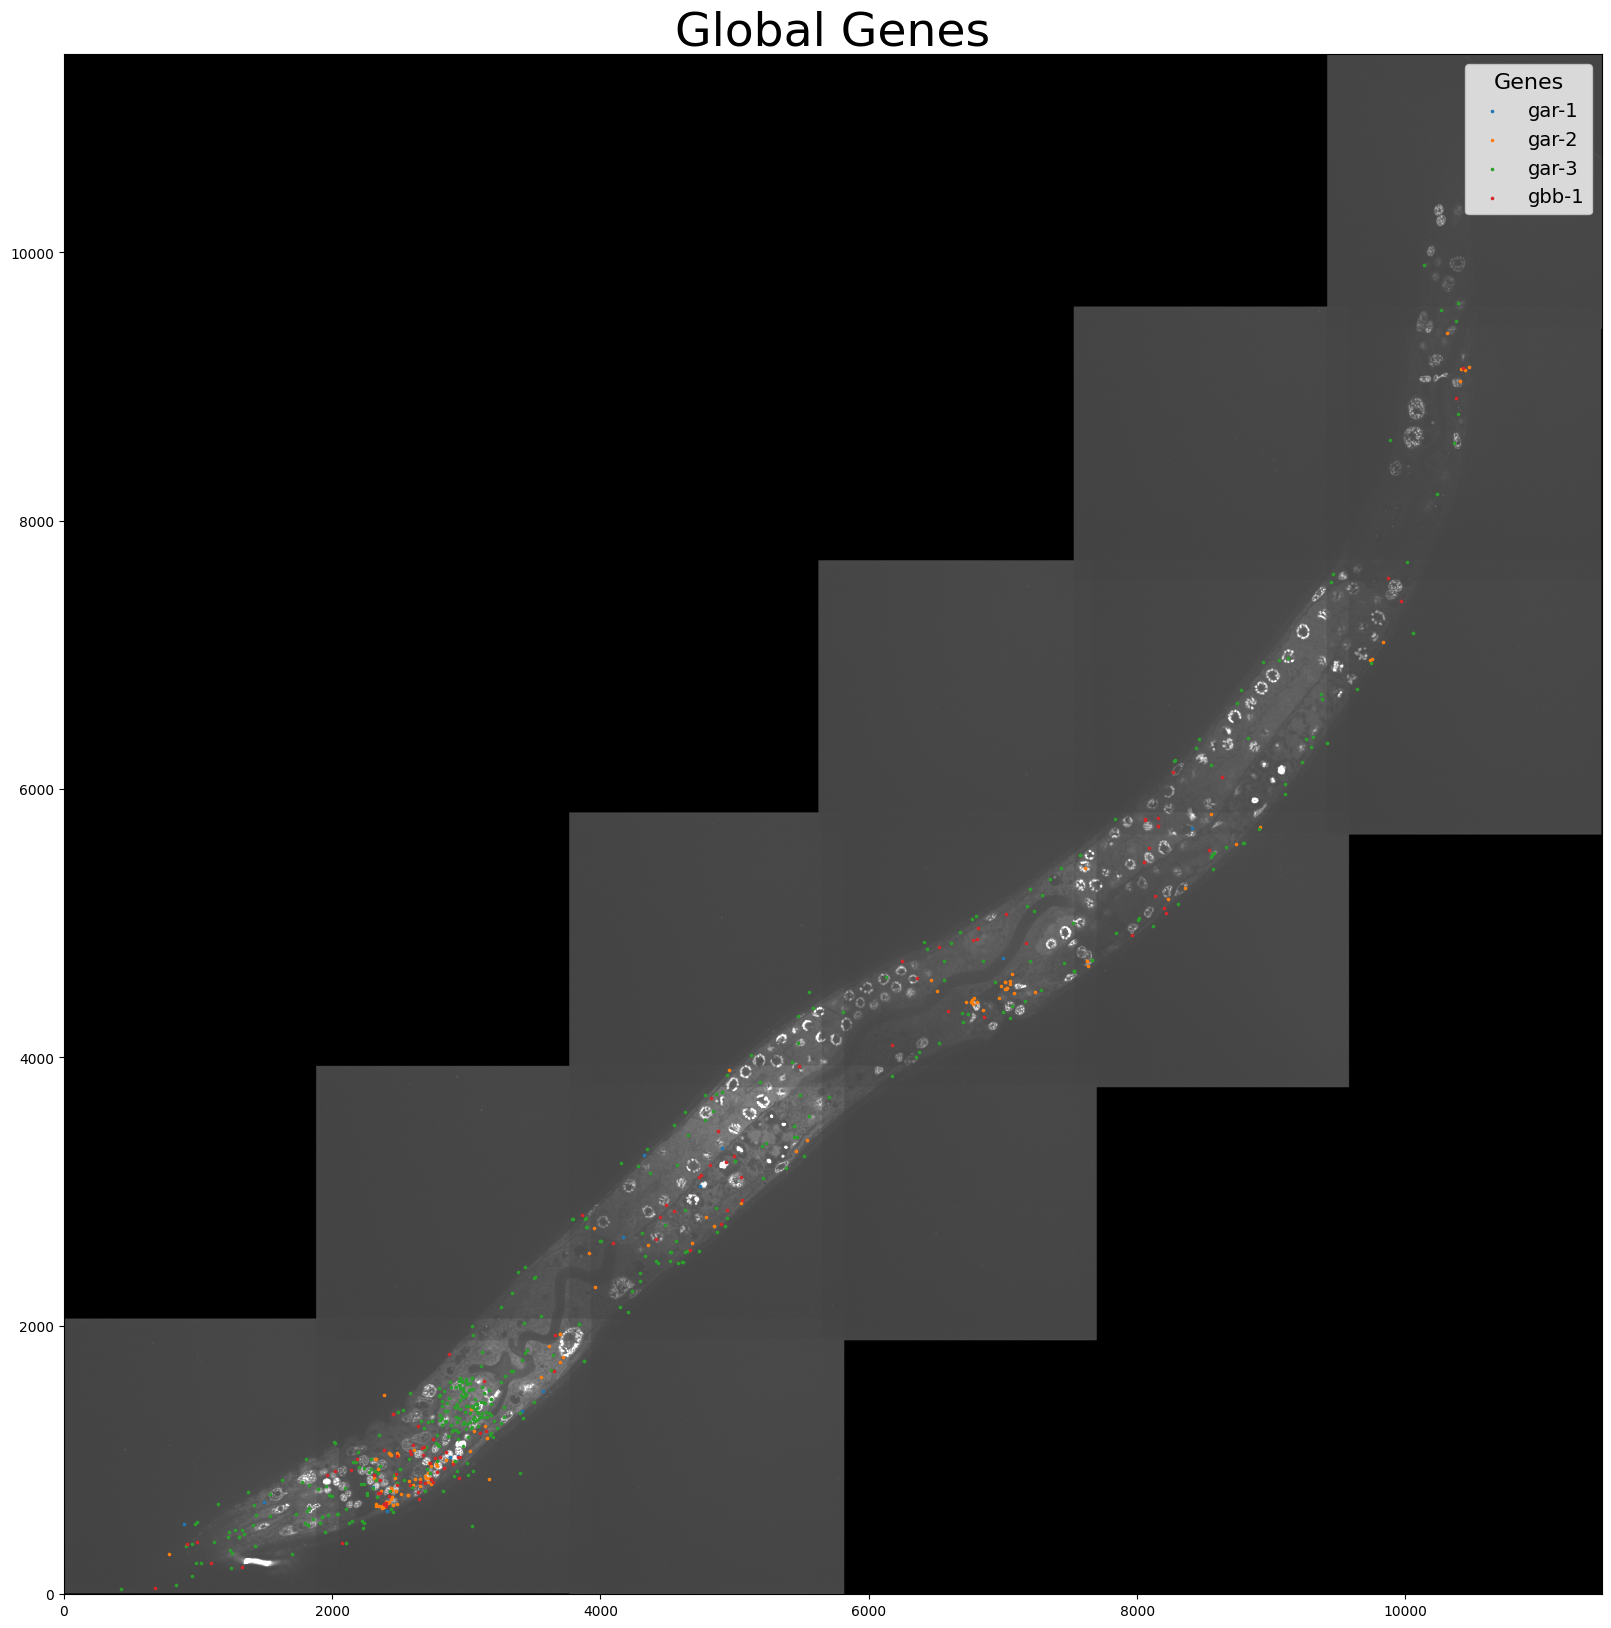

In [2]:
from exm.puncta.inspect import plot_gene_global
gene_list = ['gar-1', 'gar-2', 'gar-3','gbb-1']
mask_path = '/mp/nas3/ruihan/20230308_celegans/processed_ruihan/stitching/manual_mask.png'
plot_gene_global(args, ts, 200, gene_list, title='Global Genes', mask_path=mask_path, improved=True, save=False)

In [ ]:
from exm.puncta.inspect import inspect_raw_plotly
fov = 7
code = 1
channel = 2
ROI_min = [300,1500,1500]
ROI_max = [300,2000,2000]
vmax = 700
inspect_raw_plotly(args,fov,code,channel,ROI_min,ROI_max,vmax=vmax,export_file_name="inspect_row_code1_fov7")

### Inspect Local maximum

In [ ]:
from exm.puncta.inspect import inspect_localmaximum_matplotlib
fov = 7
code = 1
ROI_min = [300,1500,1500]
ROI_max = [300,2000,2000]
vmax = 700
inspect_localmaximum_matplotlib(args,fov,code,ROI_min,ROI_max,vmax=vmax)

In [ ]:
from exm.puncta.inspect import inspect_localmaximum_plotly
fov = 7
code = 1
channel = 2
ROI_min = [300,400,400]
ROI_max = [300,500,500]
inspect_localmaximum_plotly(args, fov, code, channel, ROI_min, ROI_max,export_file_name="inspect_localmaximum_plotly_Fov7")

### Inspect puncta within an ROI for one code

In [ ]:
from exm.puncta.inspect import inspect_puncta_ROI_matplotlib
fov = 7
code = 1
position = [300,1900,1900]
center_dist=40
inspect_puncta_ROI_matplotlib(args, fov, code, position,center_dist=center_dist)

In [ ]:
from exm.puncta.inspect import inspect_puncta_ROI_plotly
fov = 7
position = [300,1900,1900]
center_dist=40
inspect_puncta_ROI_plotly(args, fov, position,export_file_name="inspect_puncta_ROI_plotly_Fov7")

### Inspect ROI across rounds

In [ ]:
from exm.puncta.inspect import inspect_between_rounds_plotly
code1,code2 = 0, 6
fov = 7
ROI_min, ROI_max = [120,600,1500], [140,700,1600]
inspect_between_rounds_plotly(args, fov, code1, code2, ROI_min, ROI_max,export_file_name="inspect_between_rounds_plotly_code0_code6")

In [ ]:
from exm.puncta.inspect import inspect_across_rounds_plotly
fov = 7
ROI_min, ROI_max = [120,600,1500], [140,700,1600]
inspect_across_rounds_plotly(args, fov, ROI_min, ROI_max,export_file_name="inspect_across_rounds_plotly_fov7")

### Inspect puncta by index

In [ ]:
from exm.utils import retrieve_one_puncta
puncta_index = 10
fov = 7
retrieve_one_puncta(args,fov,puncta_index)

In [ ]:
from exm.puncta.inspect import inspect_puncta_individual_matplotlib
puncta_index = 10
fov = 7
inspect_puncta_individual_matplotlib(args, fov, puncta_index)

In [ ]:
from exm.puncta.inspect import inspect_puncta_individual_plotly
puncta_index = 10
fov = 7
inspect_puncta_individual_plotly(args, fov, puncta_index,export_file_name="inspect_puncta_individual_plotly_fov7_index10")